# Dimensionality Reduction Comparison

This notebook demonstrates how to apply dimensionality reduction techniques to a real-world dataset and compare their results.

## Import Required Libraries

Import the necessary libraries including numpy, matplotlib, and scikit-learn.

In [1]:
# Import necessary libraries.
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

## Define Colors and Helper Function

Define custom colors and a helper function for subplot visualization.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#F59B11", # Yellow
    "#179E86", # Dark Green
    "#44546A", # Gray
]


def plot_2d_subplot(features_list: list, labels: np.ndarray, titles: list):
    """
    Create a 1x3 subplot to show the distribution of the classes in the dataset.

    Args:
        features_list (list): A list containing the features to be plotted.
        labels (np.ndarray): The labels associated with the features.
        titles (list): The titles for each subplot.
    """
    _, axes = plt.subplots(1, 3, figsize=(24, 6))
    for ax, features_2d, title in zip(axes, features_list, titles):
        ax.scatter(
            features_2d[labels == 0, 0], features_2d[labels == 0, 1],
            label="Cats", c=colors[0], s=50, edgecolor=colors[-1], alpha=0.6
        )
        ax.scatter(
            features_2d[labels == 1, 0], features_2d[labels == 1, 1],
            label="Dogs", c=colors[1], s=50, edgecolor=colors[-1], alpha=0.6
        )
        ax.set_title(title)
        ax.set_xlabel("Component 1")
        ax.legend()
        ax.grid(True)

    axes[0].set_ylabel("Component 2")
    plt.tight_layout()
    plt.show()

## Load Features and Labels

Load pre-extracted features and labels from .npy files.

In [3]:
# Load features and labels from .npy files.
features = np.load("data/features.npy")
labels = np.load("data/labels.npy")

## Apply PCA

Apply Principal Component Analysis to reduce dimensionality to 2D.

In [4]:
# Apply PCA.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

## Apply LDA

Apply Linear Discriminant Analysis for supervised dimensionality reduction.

In [5]:
# Apply LDA.
lda = LDA(n_components=1)
features_lda = lda.fit_transform(features, labels)
features_lda = np.hstack((features_lda, np.zeros_like(features_lda)))

## Apply t-SNE

Apply t-Distributed Stochastic Neighbor Embedding for non-linear dimensionality reduction.

In [6]:
# Apply t-SNE.
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

## Compare All Methods

Plot PCA, LDA, and t-SNE results side-by-side in a 1x3 subplot for comparison.

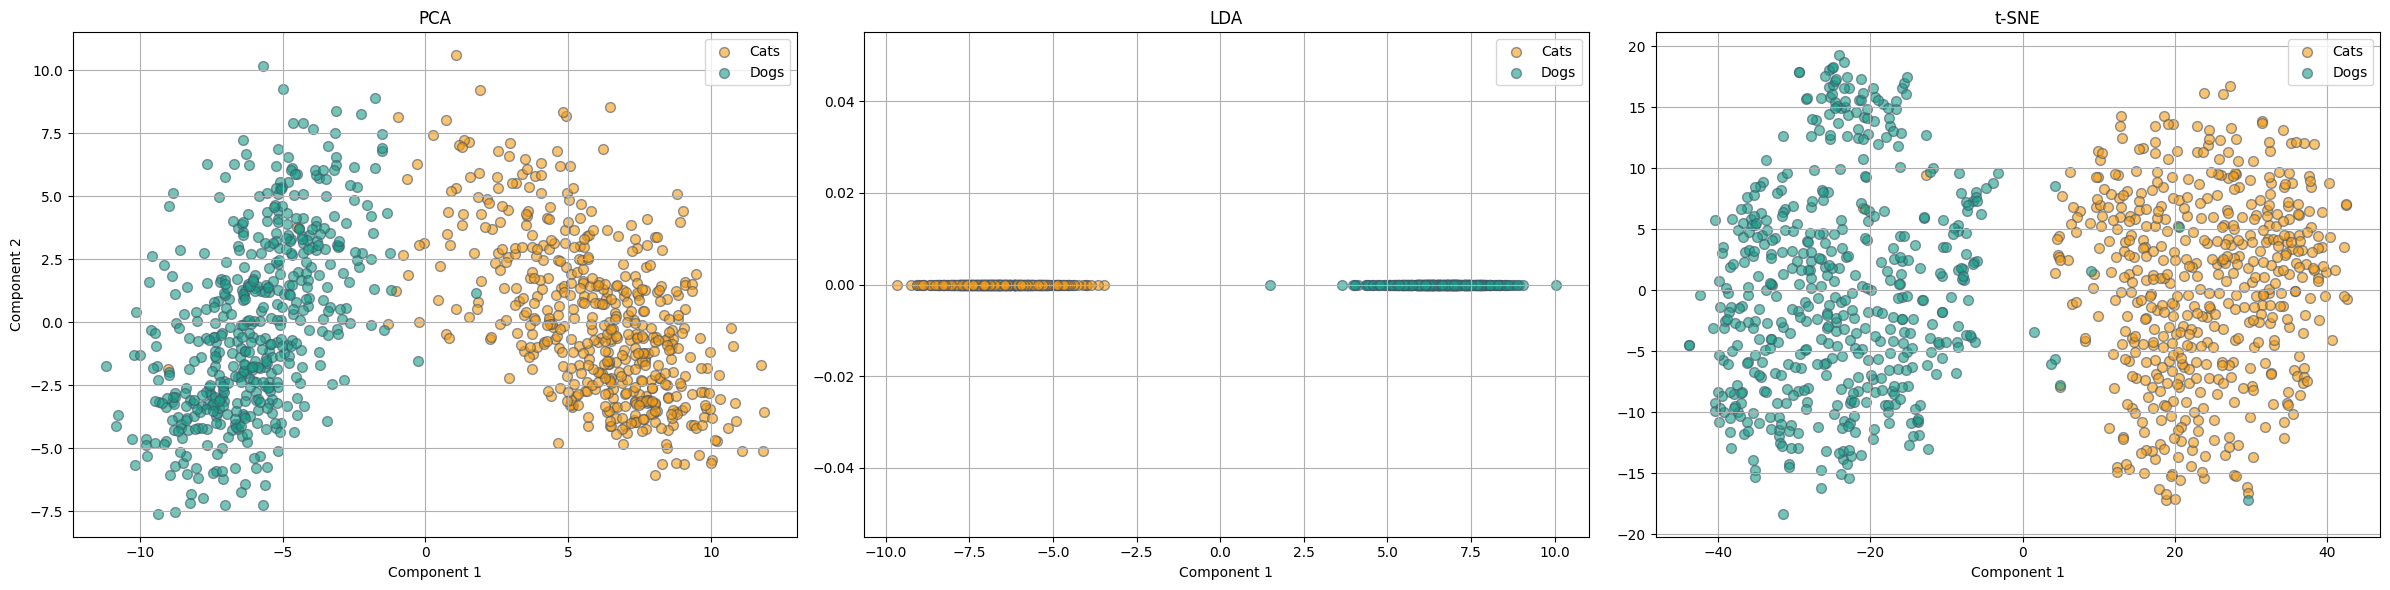

In [7]:
# Plot PCA, LDA, and t-SNE results in a 1x3 subplot.
plot_2d_subplot(
    [features_pca, features_lda, features_tsne],
    labels, ["PCA", "LDA", "t-SNE"]
)